In [1]:
import shutil, os, re, pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns

In [2]:
id = [re.findall('\d+',i) for i in os.listdir(path='/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped')]
# If we extract all directory name with findall we return it as list.
# then we convert it to a 1D array where we find the unique values of the list using set operation and appending to a dataframe.
flat_list = [j for i in id for j in i] 
aList = list(set(flat_list))
aList.sort()

In [3]:
# Create a new dataframe
df = pd.DataFrame(columns=['Subject_ID','Motion','Heart Rate','Steps','Sleep labels'])
df.head()

Empty DataFrame
Columns: [Subject_ID, Motion, Heart Rate, Steps, Sleep labels]
Index: []

In [4]:
df['Subject_ID'] = aList

In [5]:
df.head()

Subject_ID Motion Heart Rate Steps Sleep labels
0    1066528    NaN        NaN   NaN          NaN
1    1360686    NaN        NaN   NaN          NaN
2    1449548    NaN        NaN   NaN          NaN
3    1455390    NaN        NaN   NaN          NaN
4    1818471    NaN        NaN   NaN          NaN

In [6]:
first = '/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/'
def foo(path):
    f = open(path)
    lines = [[i.strip()] for i in f.readlines()]
    return lines
for i in range(len(df['Subject_ID'])):
    if df['Subject_ID'][i] == aList[i]:
        df['Motion'][i] = foo(os.path.join(first+aList[i]+'_cleaned_motion.out'))
        df['Heart Rate'][i] = foo(os.path.join(first+aList[i]+'_cleaned_hr.out'))
        df['Steps'][i] = foo(os.path.join(first+aList[i]+'_cleaned_counts.out'))
        df['Sleep labels'][i] = foo(os.path.join(first+aList[i]+'_cleaned_psg.out'))

In [7]:
df.head()

Subject_ID                                             Motion  \
0    1066528  [[0.015948 0.403931 0.449005 -0.796860], [0.03...   
1    1360686  [[1255.053419 0.019989 -0.338638 -0.943909], [...   
2    1449548  [[0.008770 0.960754 -0.128326 -0.385315], [0.0...   
3    1455390  [[0.000578 0.045166 0.446655 -0.885330], [0.02...   
4    1818471  [[0.012105 -0.352020 0.013397 0.934128], [0.03...   

                                          Heart Rate  \
0  [[6.385610 52.000000], [9.385610 52.000000], [...   
1  [[1.757280 77.000000], [4.757280 77.000000], [...   
2  [[2.500480 77.000000], [12.500480 77.000000], ...   
3  [[0.359270 87.000000], [5.359270 82.000000], [...   
4  [[7.315840 77.000000], [8.315840 77.000000], [...   

                                               Steps  \
0  [[0.015948,0.000000], [15.031397,0.000000], [3...   
1  [[1255.053419,0.000000], [1270.064205,42.98000...   
2  [[0.008770,248.670000], [15.024332,18.420000],...   
3  [[0.000578,27.630000], [15.008156,36.840000], ...   
4  [[0.012105,0.000000], [15.027303,0.000000], [3...   

                                        Sleep labels  
0  [[0.000000 0.000000], [30.000000 0.000000], [6...  
1  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
2  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
3  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
4  [[0.000000 -1.000000], [30.000000 -1.000000], ...

In [8]:
# Create a new dataframe which consist of subject id and its' respected number of records present
df_new = pd.DataFrame(columns=['Subject ID','Motion','Heart Rate','Steps','Sleep labels']) # Creates an empty dataset
df_new.head()

Empty DataFrame
Columns: [Subject ID, Motion, Heart Rate, Steps, Sleep labels]
Index: []

In [9]:
# Appending our subject id to our newly created dataset
df_new['Subject ID'] = aList
df_new.head() #df_new will be the dataframe with the lengths of the entries
# Since we appended subject ID so for the rest of the columns we get Not a Number aka NaN. This is because we didn't append the value there. 

Subject ID Motion Heart Rate Steps Sleep labels
0    1066528    NaN        NaN   NaN          NaN
1    1360686    NaN        NaN   NaN          NaN
2    1449548    NaN        NaN   NaN          NaN
3    1455390    NaN        NaN   NaN          NaN
4    1818471    NaN        NaN   NaN          NaN

In [10]:
for i in range(len(df_new['Subject ID'])):
    if df_new['Subject ID'][i] == aList[i]:
        df_new['Motion'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_motion.out')))

        df_new['Heart Rate'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_hr.out')))

        df_new['Steps'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_counts.out')))

        df_new['Sleep labels'][i] = len(foo(os.path.join(first+aList[i]+'_cleaned_psg.out')))

In [11]:
df_new.head()

Subject ID   Motion Heart Rate Steps Sleep labels
0    1066528  1187903       4964  1892          951
1    1360686  1383532       5574  1850          967
2    1449548  1620804       5549  1927          964
3    1455390  1483701       5717  1978          989
4    1818471  1481035       5701  1973          987

In [12]:
len(df_new['Sleep labels'])

31

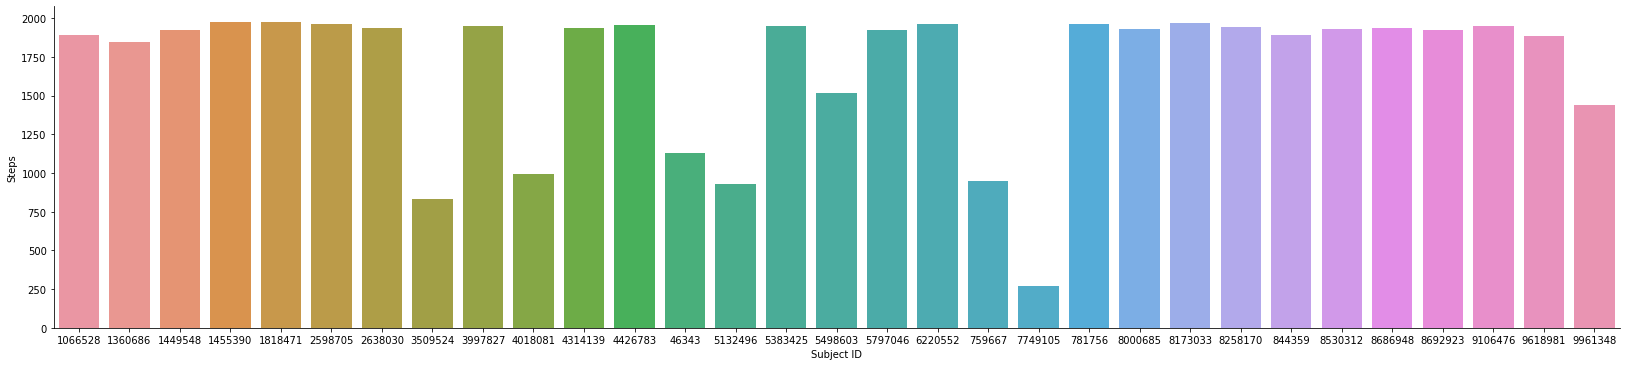

In [13]:
# Plot for steps
sns.catplot(x='Subject ID', y='Steps', kind='bar', data=df_new,aspect=45/10)

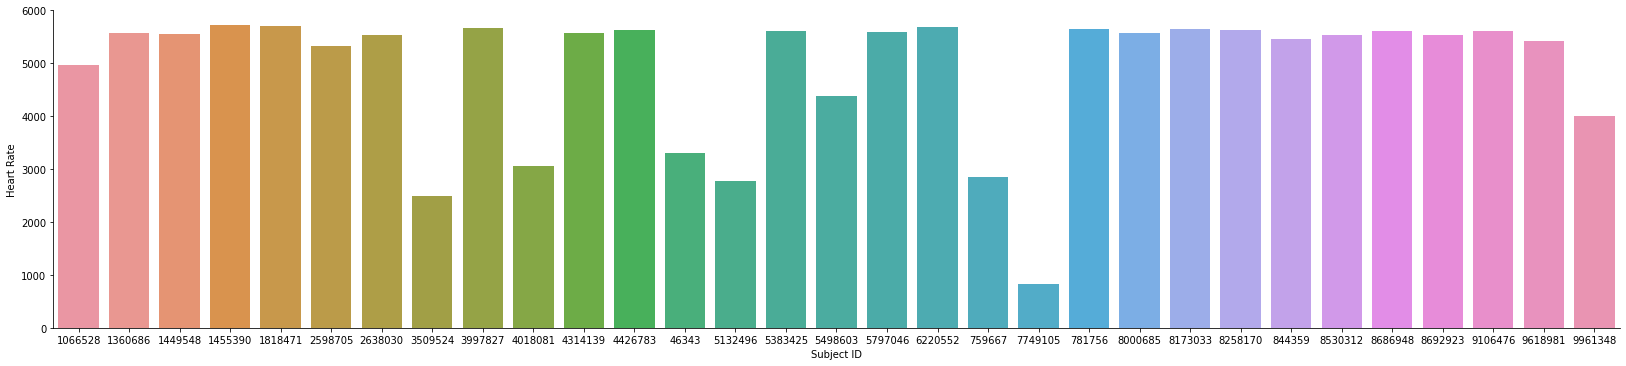

In [14]:
# Plot for Heart Rate
sns.catplot(x='Subject ID', y='Heart Rate', kind='bar', data=df_new,aspect=45/10)

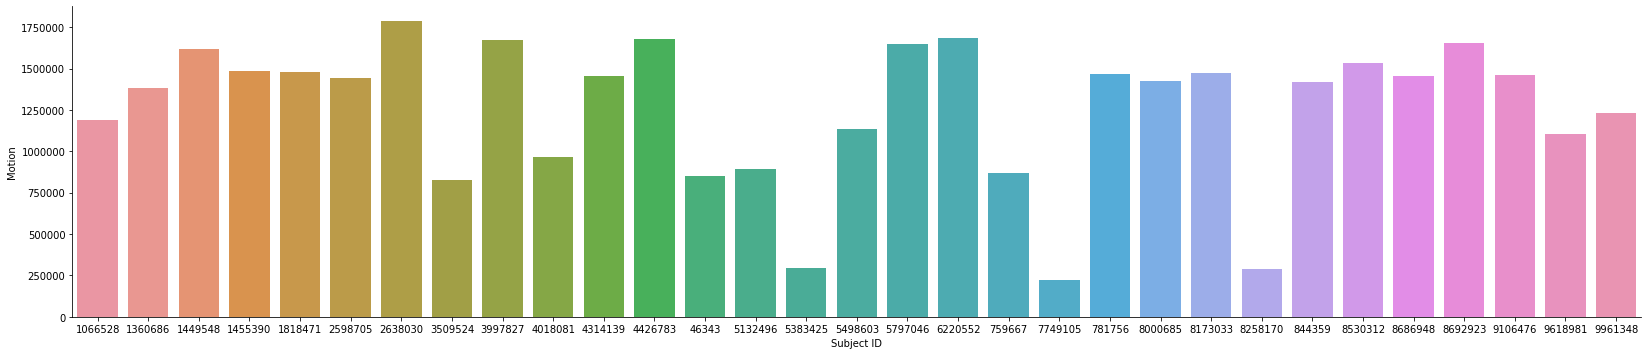

In [15]:
# Plot for Motion
sns.catplot(x='Subject ID', y='Motion', kind='bar', data=df_new,aspect=45/10)
plt.ticklabel_format(useOffset=False, style='plain', axis='y')

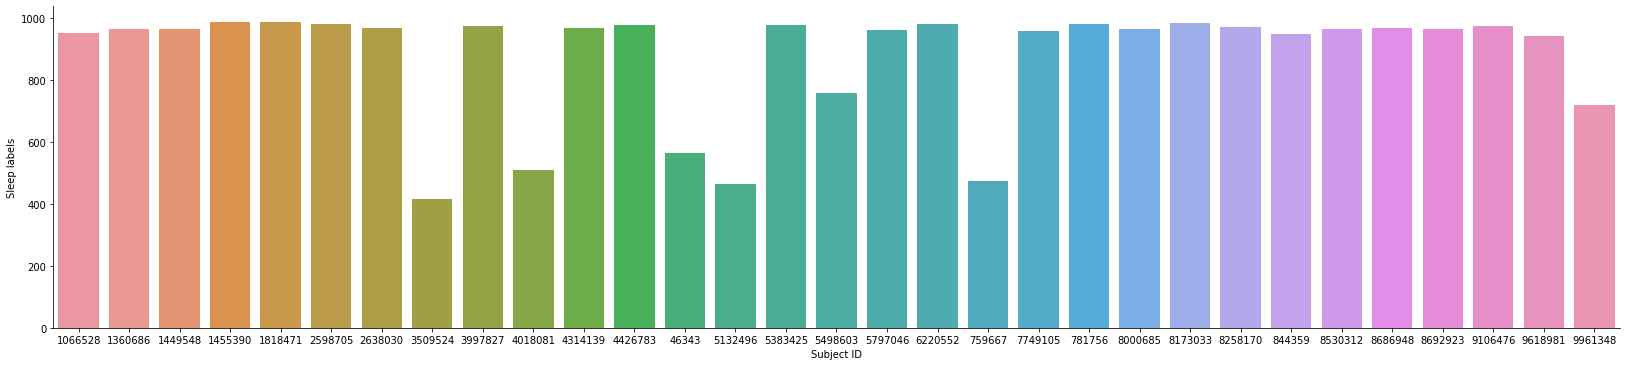

In [16]:
# Plot for Sleep Labels
sns.catplot(x='Subject ID', y='Sleep labels', kind='bar', data=df_new,aspect=45/10)

In [17]:
## -- PART II -- ##
#show/plot the total amount of records per sleep stage (for  all subjects together)
z = []
def fileRead(path):
    f = open(path)
    lines = [i.split() for i in f.readlines()]
    return lines
first = '/Users/aneruthmohanasundaram/Documents/GitHub/Data-Analytics/Practical Session 3/cropped/'
for i in range(len(df['Subject_ID'])):
    if df['Subject_ID'][i] == aList[i]:
        z.append( os.path.join(first+aList[i]+'_cleaned_psg.out')  )

wq,qw = [],[]
for i in z:
    for k,j in fileRead(i):
        wq.append(k)
        qw.append(j)
qw.sort()
amna = pd.DataFrame(columns=['t','x'])
amna['t'] = wq
amna['x'] = qw

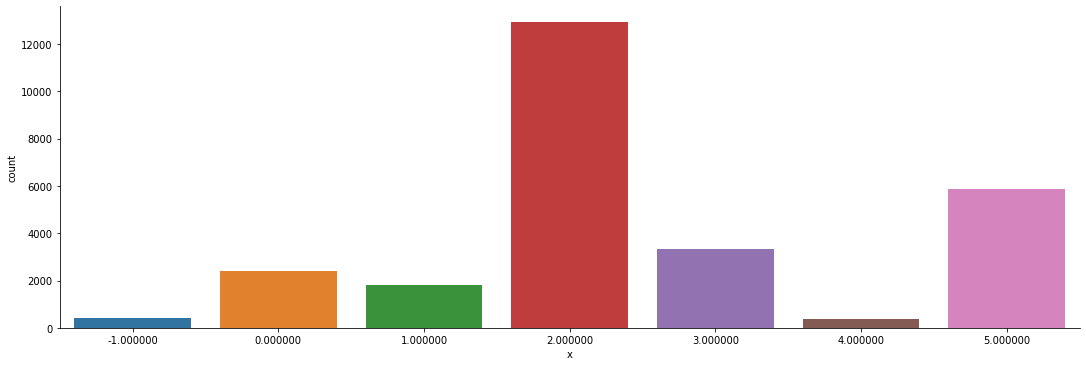

In [18]:
sns.catplot(x='x', kind='count', data=amna, height=5, aspect=15/5)

In [19]:
## -- PART III -- ##
#using  the data collected from a  randomly chosen subject id plot:
# subject ID = 9961348

In [20]:
######   all three acceleration axes per timestamp (in one graph) ######
accel_list = df.loc[30,'Motion']
for i in range(len(accel_list)):
  accel_list[i] = accel_list[i][0].split(" ")
  [float(x) for x in accel_list[i]] 

In [21]:
time_stamps_accel,x_axis,y_axis, z_axis = map(list, zip(*accel_list))

In [22]:
# Create a new data frame so that u can plot it easily
ane = pd.DataFrame(columns=['Time Stamp','X','Y','Z'])
ane['Time Stamp'] = time_stamps_accel
ane['X'] = x_axis
ane['Y'] = y_axis
ane['Z'] = z_axis
ane.head()

Time Stamp          X         Y          Z
0   0.018318  -0.283127  0.250244  -0.919311
1   0.029009  -0.282196  0.253677  -0.915863
2   0.049053  -0.283173  0.256134  -0.917374
3   0.068820  -0.283142  0.253189  -0.919311
4   0.088152  -0.281631  0.252197  -0.922714

In [23]:
xy = ane.head() # To plot this to remove RAM memory allocation 
import warnings
warnings.filterwarnings('ignore')

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

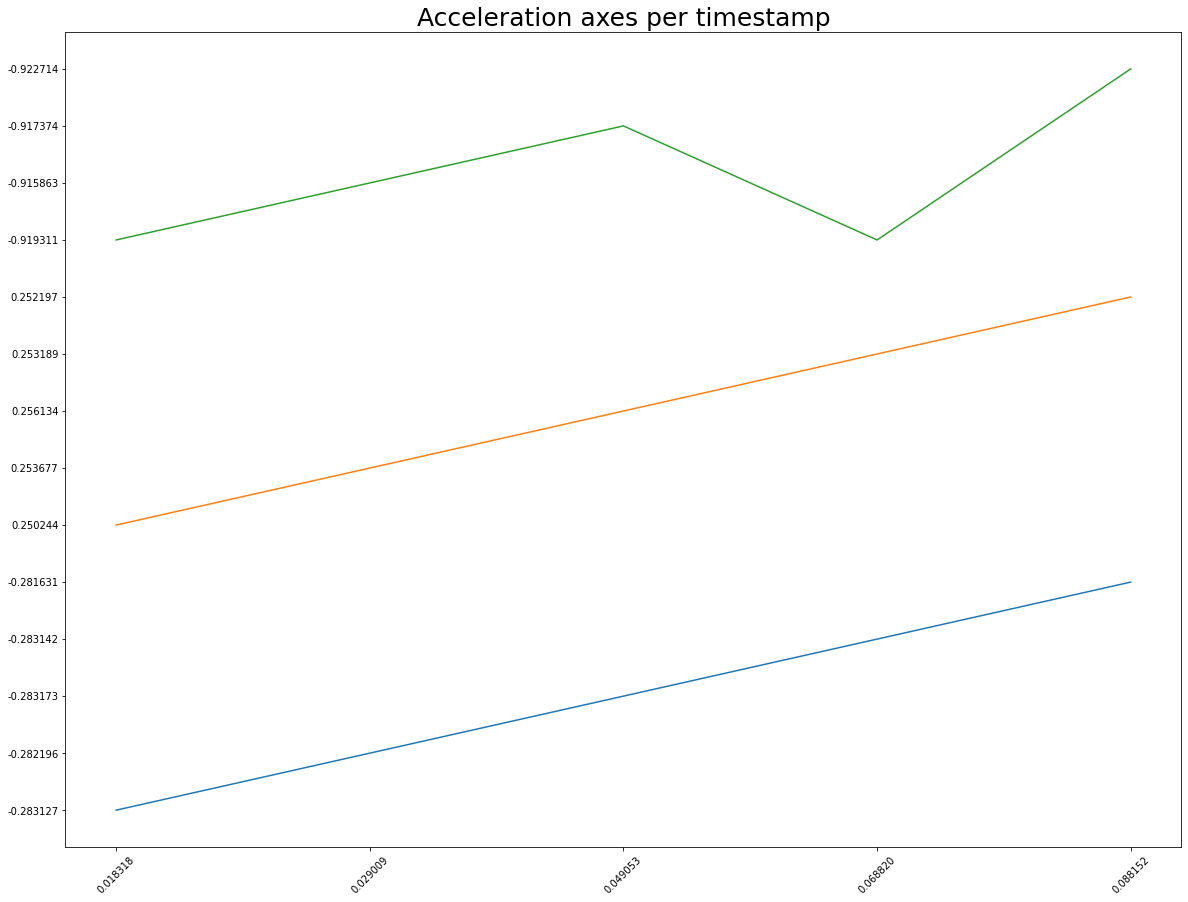

In [24]:
plt.figure(figsize=(20,15))
plt.plot('Time Stamp','X',data=xy)
plt.plot('Time Stamp','Y',data=xy)
plt.plot('Time Stamp','Z',data=xy)
plt.title('Acceleration axes per timestamp',fontsize=25)
plt.xticks(rotation = 45)

In [25]:
######   heart rate values per timestamp ######
hr_list = df.loc[30,'Heart Rate']
for i in range(len(hr_list)):
  hr_list[i] = hr_list[i][0].split(" ")
  [float(x) for x in hr_list[i]] 

In [26]:
time_stamps_hr,hr = map(list, zip(*hr_list))

In [27]:
heart_rate = pd.DataFrame(columns=['Time Stamp'])
heart_rate['Time Stamp'] = time_stamps_hr
heart_rate['heart Rate'] = hr
heart_rate.head()

Time Stamp heart Rate
0   0.822260  52.000000
1   7.822290  53.000000
2  11.822290  54.000000
3  16.822260  55.000000
4  21.822260  55.000000

In [28]:
yx = heart_rate.head(40) # To plot this to remove RAM memory allocation 

Text(0.5, 1.0, 'heart rate values per timestamp')

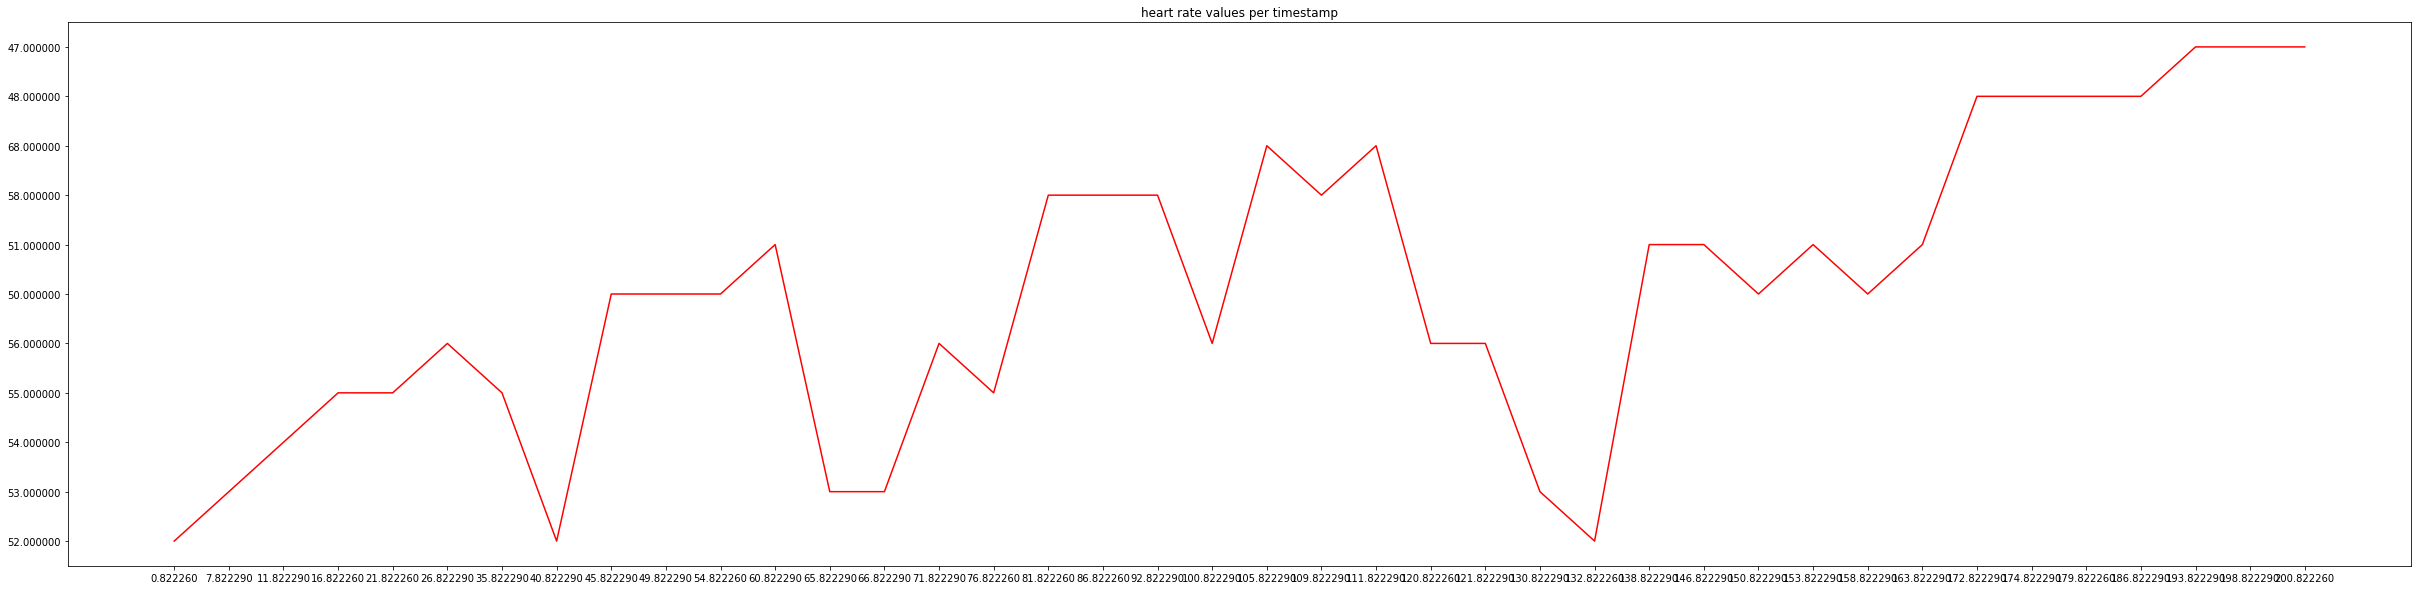

In [29]:
plt.figure(figsize=(42,10))
plt.plot('Time Stamp', 'heart Rate', data=yx, color='red')
plt.title('heart rate values per timestamp')

In [30]:
#####    sleep stages per timestamp ######
sleep_list = df.loc[30,'Sleep labels']

#Making a list out of every entry
for i in range(len(sleep_list)):
  sleep_list[i] = sleep_list[i][0].split(" ")
  [float(x) for x in sleep_list[i]] 
  
#splits nested list into seperate columns
time_stamps_sleep,sleep_lab = map(list, zip(*sleep_list))

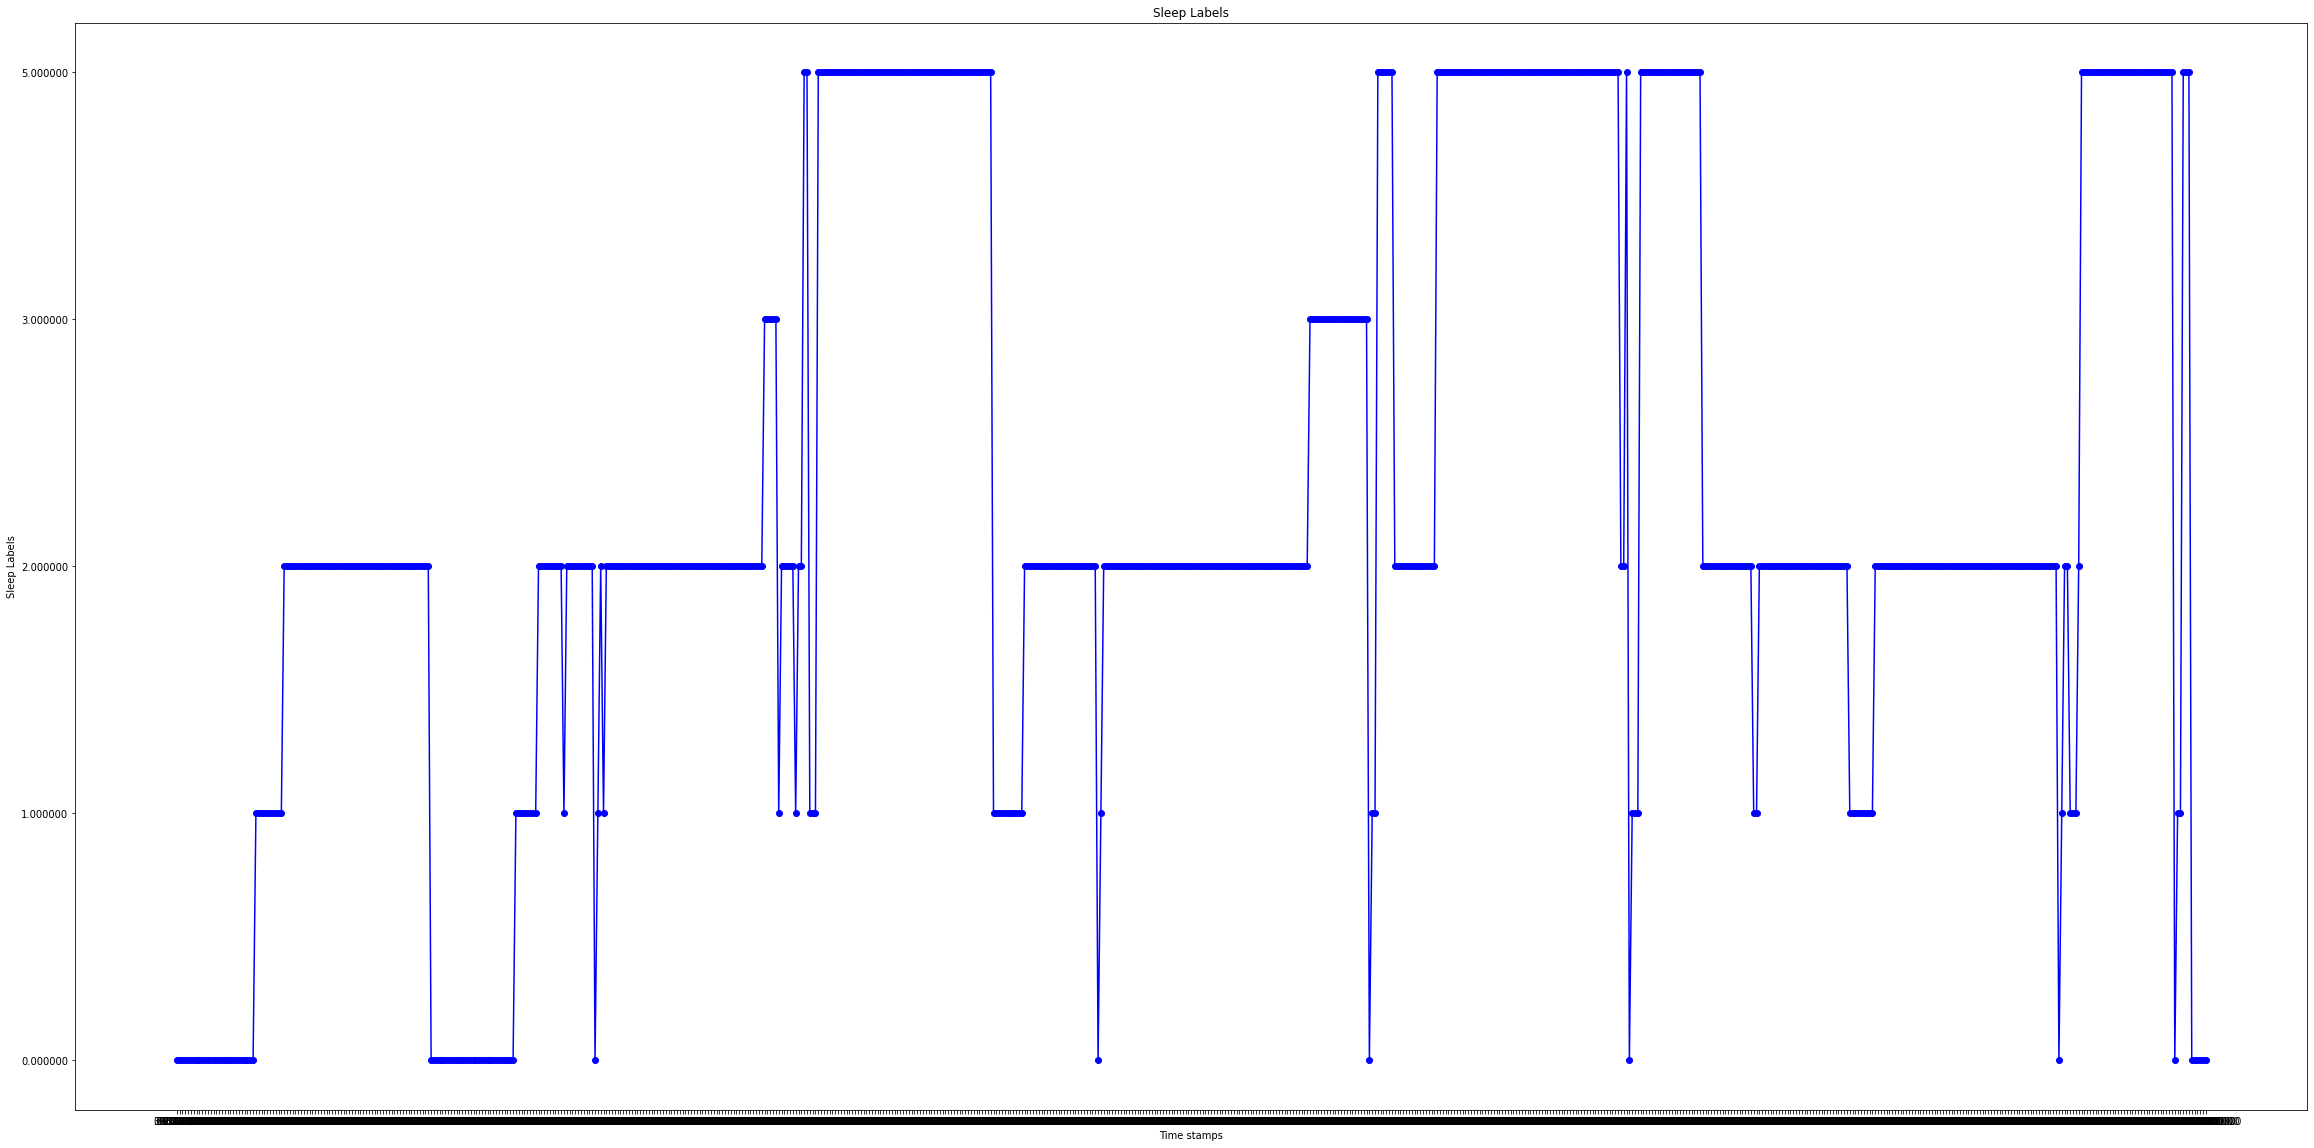

In [31]:
plt.figure(figsize=(40,20))
plt.plot(time_stamps_sleep,sleep_lab, 'bo',linestyle = 'solid')
plt.xlabel('Time stamps')
plt.ylabel('Sleep Labels')
plt.title('Sleep Labels')
plt.show()

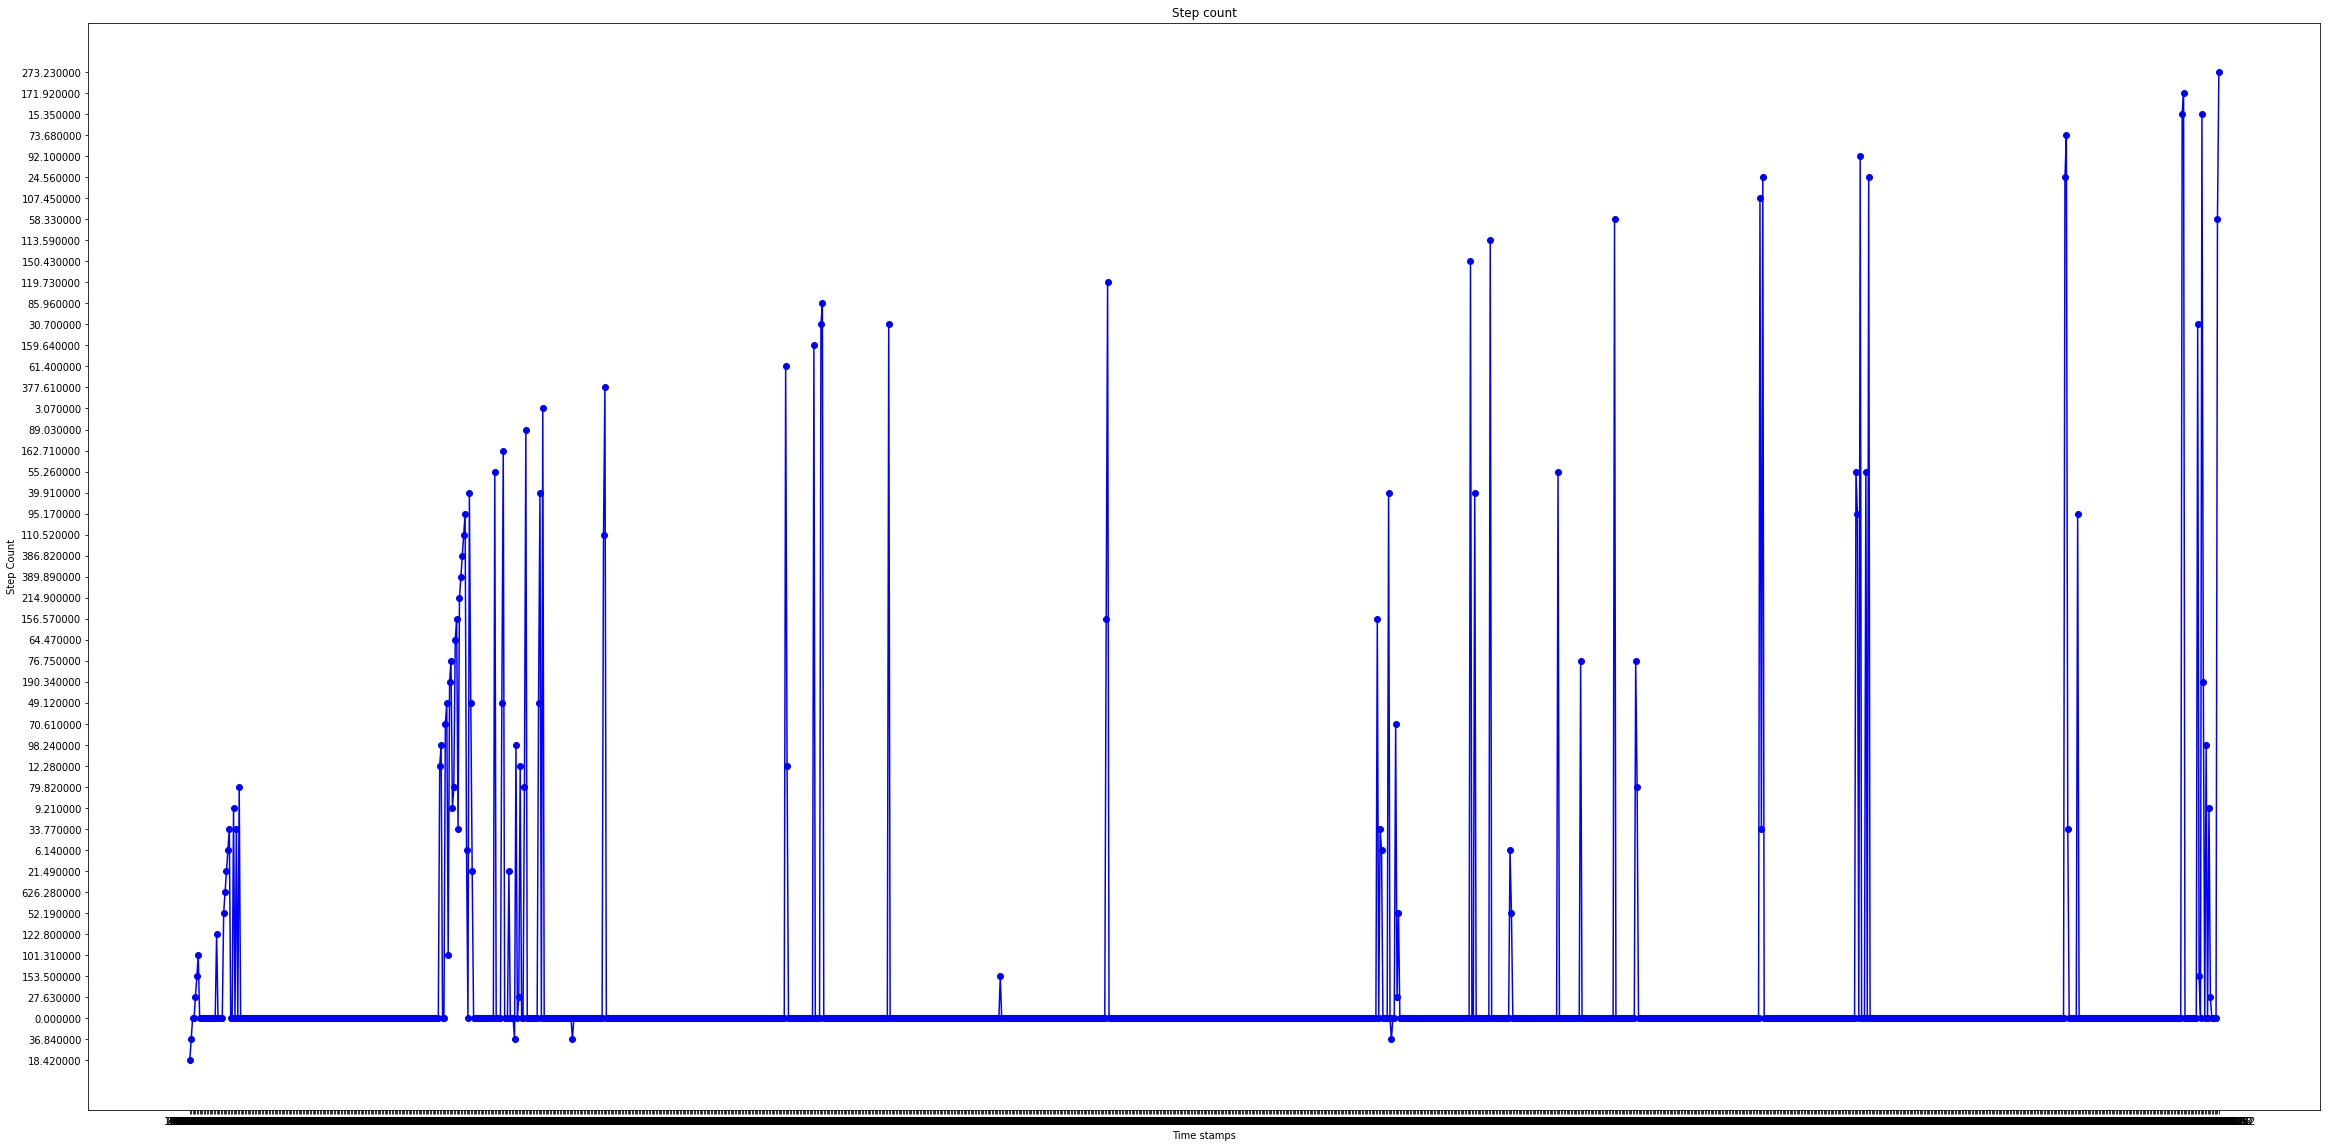

In [32]:
######   nr of steps per timestamp ######
step_list = df.loc[30,'Steps']
step_list
#Making a list out of every entry
for i in range(len(step_list)):
  step_list[i] = step_list[i][0].split(",")
  [float(x) for x in step_list[i]] 

#splits nested list into seperate columns
time_stamps_step,step = map(list, zip(*step_list))

plt.figure(figsize=(40,20))
plt.plot(time_stamps_step,step, 'bo',linestyle='solid')
plt.xlabel('Time stamps')
plt.ylabel('Step Count')
plt.title('Step count')
plt.show()

In [43]:
ane.shape

(1233383, 4)

In [33]:
from mpl_toolkits.mplot3d import Axes3D

Text(0, 0.5, 'Acceleration in m/s2')

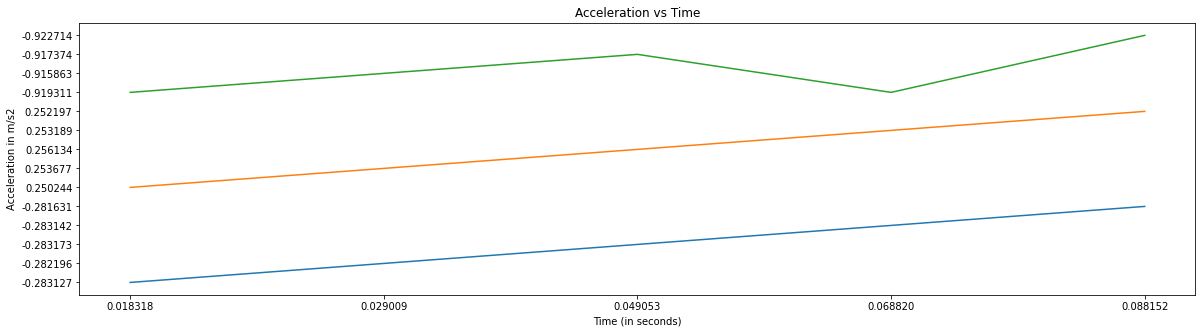

In [34]:
plt.figure(figsize=(20,5))
plt.plot('Time Stamp','X',data=xy)
plt.plot('Time Stamp','Y',data=xy)
plt.plot('Time Stamp','Z',data=xy)
plt.title("Acceleration vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Acceleration in m/s2")

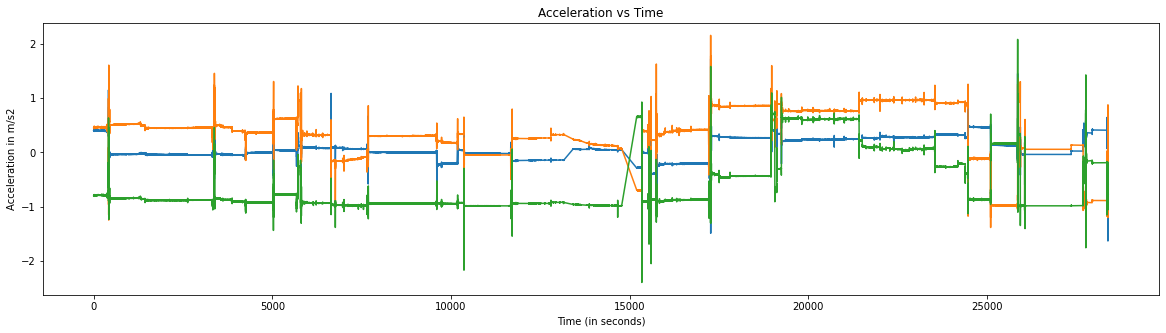

In [35]:
from mpl_toolkits.mplot3d import Axes3D  
def data_format(row,index):
  newData = []
  for i in row:
    
    if(type(i[0])==str):
      split_data = [float(x) for x in i[0].split()]
    else:
      split_data = [x for x in i]
    newData.append(split_data[index])
  return newData

data_frame_subject = df.loc[df["Subject_ID"]=='1066528'].copy()

### motion values in all axes in one graph ###
motion_data_time = data_frame_subject.apply(lambda row: data_format(row["Motion"],0),axis=1).tolist()[0]
motion_data_x = data_frame_subject.apply(lambda row: data_format(row["Motion"],1),axis=1).tolist()[0]
motion_data_y = data_frame_subject.apply(lambda row: data_format(row["Motion"],2),axis=1).tolist()[0]
motion_data_z = data_frame_subject.apply(lambda row: data_format(row["Motion"],3),axis=1).tolist()[0]
plt.figure(figsize=(20,5))
plt.plot(motion_data_time, motion_data_x)
plt.plot(motion_data_time, motion_data_y)
plt.plot(motion_data_time, motion_data_z)
plt.title("Acceleration vs Time")
plt.xlabel("Time (in seconds)")
plt.ylabel("Acceleration in m/s2")
plt.show()

In [44]:
def data_format(row,index):
  newData = []
  for i in row: 
    split_data = [float(x) for x in i[0].split()]
    newData.append(split_data[index])
  return newData

In [7]:
ane.head()

age state  point
Alice  [[20, 56, 43, 77, 12]]    NY     64
Bob    [[32, 34, 21, 41, 51]]    CA     92

In [11]:
df.head()

Subject_ID                                             Motion  \
0    1066528  [[0.015948 0.403931 0.449005 -0.796860], [0.03...   
1    1360686  [[1255.053419 0.019989 -0.338638 -0.943909], [...   
2    1449548  [[0.008770 0.960754 -0.128326 -0.385315], [0.0...   
3    1455390  [[0.000578 0.045166 0.446655 -0.885330], [0.02...   
4    1818471  [[0.012105 -0.352020 0.013397 0.934128], [0.03...   

                                          Heart Rate  \
0  [[6.385610 52.000000], [9.385610 52.000000], [...   
1  [[1.757280 77.000000], [4.757280 77.000000], [...   
2  [[2.500480 77.000000], [12.500480 77.000000], ...   
3  [[0.359270 87.000000], [5.359270 82.000000], [...   
4  [[7.315840 77.000000], [8.315840 77.000000], [...   

                                               Steps  \
0  [[0.015948,0.000000], [15.031397,0.000000], [3...   
1  [[1255.053419,0.000000], [1270.064205,42.98000...   
2  [[0.008770,248.670000], [15.024332,18.420000],...   
3  [[0.000578,27.630000], [15.008156,36.840000], ...   
4  [[0.012105,0.000000], [15.027303,0.000000], [3...   

                                        Sleep labels  
0  [[0.000000 0.000000], [30.000000 0.000000], [6...  
1  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
2  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
3  [[0.000000 -1.000000], [30.000000 -1.000000], ...  
4  [[0.000000 -1.000000], [30.000000 -1.000000], ...

In [22]:
cols = [x for x in df['Subject_ID']]

In [28]:
for index,row in df.iterrows():
    print(index,row[1])

0 1066528
1 1360686
2 1449548
3 1455390
4 1818471
5 2598705
6 2638030
7 3509524
8 3997827
9 4018081
10 4314139
11 4426783
12 46343
13 5132496
14 5383425
15 5498603
16 5797046
17 6220552
18 759667
19 7749105
20 781756
21 8000685
22 8173033
23 8258170
24 844359
25 8530312
26 8686948
27 8692923
28 9106476
29 9618981
30 9961348
